# Least Squares

## Pre-lab Reading: Bias-Variance (do this *before* the lab!)

Read about bias-variance [here](http://scott.fortmann-roe.com/docs/BiasVariance.html). Make sure you can answer the following questions:
* Why do we want a predictor not to be *biased*?
* Why do we want a predictor not to have large *variance*?
* Why do these two often work in opposition to one another?

> ## Make a copy of this notebook (File menu -> Make a Copy...)

## Least Squares as an Overdetermined System

**Question 1** Consider the three points $(1,5)$, $(2,12)$, and $(4,26)$. 
1. Using high-school algebra, find an equation for line passing through these three points.<br><br>
1. Write a matrix equation $Ax=b$ whose solution gives the line above. (Hint: If $y=mx+c$, write three equations that must be satisfied by $m$ and $c$, then translate your system into matrix form.)<br><br>
1. Since there is a solution to your system, the vector $b$ must be in what fundamental space of the matrix $A$?



In [2]:
import numpy as np
from Qiureferencefunctions import rowred, rowaddmult, swaprows,backsub,rowredpivot,LU,fwdsub

from rref import rref
A = np.array([[1,1,1],[4,2,1],[16,4,1]]) #really just to have 2 cols but for the sake of being able to use the numpy thing
b = np.array([[5],[12],[26]])
print(A)
print(b)
#print(np.linalg.inv(A) @b) 

[[ 1  1  1]
 [ 4  2  1]
 [16  4  1]]
[[ 5]
 [12]
 [26]]


**Question 2** Now consider the points $(1,4.7)$, $(2,11.6)$, and $(4,26.4)$. Is there a line that passes through these three points? Justify your answer using the language of linear algebra (matrices and fundamental spaces).

As you may have noticed, these points are very close to the ones in the previous question. That is, the line you found in Question 1 is a *pretty good* fit for the points in Question 2. It makes sense to ask 'just how good is it?' and 'is there a better line'?

Regardless of these questions, we can see both systems above as *overdetermined*. That is, there are more equations than variables. Overdetermined systems can either have a unique solution or no solution at all. We will see today that many problems can be cast in terms of using linear algebra techniques to find a 'best' model in the case that there is no solution.




In [3]:
A = np.array([[1,1,1],[4,2,1],[16,4,1]])
b = np.array([[4.7],[11.6],[26.4]])
print(A)
print(b)
#print(np.linalg.inv(A) @b)

[[ 1  1  1]
 [ 4  2  1]
 [16  4  1]]
[[ 4.7]
 [11.6]
 [26.4]]


## Fitting a Polynomial to Data


**Question 3** Look back at the last part of Lab 3, where we used LU decomposition to fit an $n-1$ degree polynomial to $n$ data points.
1. Use the techniques from Lab 3 to find a quadratic polynomial that fits the points from Question 2.<br><br>
1. Plot your points, the line you found in Question 1, and the polynomial from the previous part of this question on the same axes. <br><br>
1. Suppose that these points were the result of an experiment that produced the $y$-values from $x$-values. Suppose we wanted to use a model to find what the $y$ value corresponding to, say, $x=10$ should be. Which equation would you feel more comfortable using, the line or the polynomial? After you've done the reading in the pre-lab, explain your answer in terms of bias and variance. You may want to change your points slightly, recompute the quadratic, and look at how your predictions for $x=10$ vary.


**Note:** To plot the functions, say, $x^2$ and $x^3$ in blue and red respectively, with domain $-25<x<25$, and the points $(1,4)$, $(5,0)$, and $(6,2)$, you can use the following code:

```python
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(-25,25,100) # 100 linearly spaced numbers - read up on the np.linspace() command!
y1 = x**2
y2 = x**3
plt.plot(x,y1,'b',x,y2,'r')
plt.scatter([1,5,6],[4,0,2])
```

[[ 1.  1.  1.]
 [ 4.  2.  1.]
 [16.  4.  1.]]
[[1.     0.     0.    ]
 [0.25   1.     0.    ]
 [0.0625 0.75   1.    ]]
[26.4 11.6  4.7]
[ 0.16666667  6.4        -1.86666667]


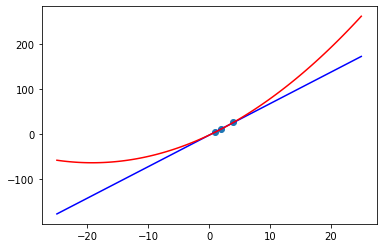

In [4]:
a = np.array([1,2,4])
v = np.array([4.7,11.6,26.4])
rows = a.shape[0]
AA = np.zeros((rows,rows))
for i in range(0,rows):
    x = pow(a,i)
    AA[:,i] = x
AA =np.fliplr(AA)
#A = np.zeros((rows,rows+1))
#A[:,:rows] = AA
#A[:,rows] = v
np.set_printoptions(suppress=True)

print(AA)
U,L,P = LU(AA)
print(L)
v = P@v
print(v)
y = fwdsub(L,v)
print(backsub(U,y))


%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(-25,25,100) # 100 linearly spaced numbers - read up on the np.linspace() command!
y1 = 7*x - 2
y2 = 0.166666667*x**2 + 6.4*x - 1.8666666667
plt.plot(x,y1,'b',x,y2,'r')
plt.scatter([1,2,4],[4.7,11.6,26.4])


## Least Squares


### The 2-D Case

As you talked about in class, the best fit line for a set of data is given by the line that minimizes the sum of the squares of the distances of the data points from the line.

**Question 4** 
1. Suppose that the points $(x_1,y_1)$, $(x_2,y_2)$, and $(x_3,y_3)$ are collinear (that is, they fall on the same line). Write down a matrix equation for $m$ and $c$ (Hint: this is similar to Question 1). Explain in terms of linear combinations and fundamental spaces why your equation has a solution.<br><br>
1. Suppose that the points $(x_1,y_1)$, $(x_2,y_2)$, and $(x_3,y_3)$ are *not* collinear. Write down a matrix equation for $m$ and $c$. Explain why your equation *does not* have a solution. Again, write your answer in terms of linear combinations and fundamental spaces.<br><br>
1. If the three points are not collinear, then the vector on the right side of your equation is not in in the $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~}$ space of the matrix on the left. (Fill in the blank.)

As we learned in class, when we cannot find a solution $x$ to the equation $Ax=b$, we can project $b$ onto the closest point $p$ in the $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~}$ space of $A$ and solve $A\hat{x}=p$ instead. To do this, we solve the *normal equation*:

$$\large{A^TA\hat{x}=A^Tb}$$

**Question 5** Use your LU decomposition code from prior labs and the normal equation to find the best fit line to the set of points from Question 2. Plot the points and your line.

[ 7.25714286 -2.7       ]


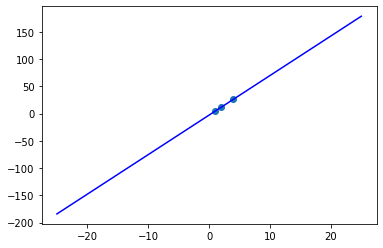

In [5]:
a = np.array([1,2,4])
v = np.array([4.7,11.6,26.4])
rows = a.shape[0]
AA = np.zeros((rows,2))
for i in range(0,rows-1):
    x = pow(a,i)
    AA[:,i] = x
AA =np.fliplr(AA)
v = AA.T @ v
At = AA.T @ AA

U,L,P = LU(At)
v = P@v

y = fwdsub(L,v)
print(backsub(U,y))
x = np.linspace(-25,25,10) # 100 linearly spaced numbers - read up on the np.linspace() command!
y1 = 7.25714286*x - 2.7
plt.plot(x,y1,'b')
plt.scatter([1,2,4],[4.7,11.6,26.4])

# Question 4 -> when the points are not collinear, the "y" vector is not a linear combination of the matrix between [c,m] and the matrix of x values to various powers.
#solve by projecting normal equation into ___???
#by using A transpose, A^T * A turns into just a matrix of dot products of the columns with itself.
#^ and then on the righthand side, we get the dot product of each column (transposed) with the entire b vector. 
#**** basically, we are able to solve this by using the normal equation - there is definitively an answer to this equation 
#when the b vector is not in the column space of A.
#doing A transpose b ensures that this lives in the col space of A^t = the row space of A.

**Question 6** (From Larsen, R.J., and Marx, M.L. (1986). An Introduction to Mathematical Statistics and its Applications, 2nd Edition. Case study 1.2.4., also from the first 105L Lab):

> Since World War II, plutonium for use in atomic weapons has been produced at an Atomic Energy Commission facility in Hanford, Washington.  One of the major safety problems encountered there has been the storage of radioactive wastes.  Over the years, significant quantities of these substances, including strontium 90 and cesium 137---have leaked from their open-pit storage areas into the nearby Columbia River, which flows along the Washington-Oregon border, and eventually empties into the Pacific Ocean.

To measure the extent to which exposure to the radiation affected cancer mortality rates during 1959-1964, researchers calculated an *index of exposure*.  The index takes into consideration the county's distance down the river from the plant and the distance from the river.  More precisely, the index is formulated on the assumption that county or city exposure is directly proportional to river frontage and inversely proportional both to the distance from the Hanford site and the square of the county's (or city's) average depth away from the river (David A. Smith and L.C. Moore, Calculus: Modeling and Application, 1996).  The following table gives the index of exposure and cancer mortalities (the average number of cancer deaths per 20,000 residents per year during the period 1959-1964).


County | Exposure | Mortality |
--- |:---:| ---:| 
Umatilla | 2.49 | 147.1 |
Morrow | 2.57 | 130.1 |
Gilliam | 3.41 | 129.9 |
Sherman | 1.25 | 113.5 |
Wasco | 1.62 | 137.5 |
Hood River | 3.83 | 162.3 |
Portland | 11.64 | 207.5 |
Columbia | 6.41 | 177.9 |
Clatsop | 8.34 | 210.3 |

Compute a best fit line for this data and use to predict the mortality for a new development along the river whose index of exposure is calculated to be 10.

**Note:** If you took 105L, compare your answer to the best fit line presented in the Cancer Mortality lab in that class.


[  9.23145627 114.71563082]
207.03019352


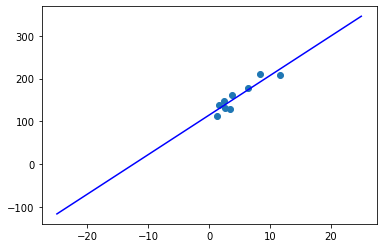

In [6]:
a = np.array([2.49,2.57,3.41,1.25,1.62,3.83,11.64,6.41,8.34])
A = np.ones([9,2])
A[:,0] = a
V = np.array([147.1,130.1,129.9,113.5,137.5,162.3,207.5,177.9,210.3])
At = A.T @ A
v = A.T @ V
U,L,P = LU(At)
v = P@v
y = fwdsub(L,v)
print(backsub(U,y))
def mortality (x):
    return x*9.23145627 +114.71563082
print(mortality(10))
x = np.linspace(-25,25,10) # 100 linearly spaced numbers - read up on the np.linspace() command!
y1 = x*9.23145627 +114.71563082
plt.plot(x,y1,'b')
plt.scatter(a,V)

### Fitting Polynomials to Data

We saw above that fitting a line to data involved finding the slope and $y$-intercept of the line $y=mx+c$. Similarly, a quadratic function is given by $f(x)=ax^2+bx+c$.

**Question 7** Consider the points $(1,2)$, $(2,4)$, and $(5,-1)$.
* If a quadratic function $f(x)=ax^2+bx+c$ passes through these points, write down three equations satisfied by $a$, $b$, and $c$.<br><br>
* Rewrite your equations as a matrix equation.

**Note:** The question above is very similar to the work we did at the end of the LU decomposition lab and its associated homework.

In [7]:
# a + b + c = 2
# 4a + 2b + c = 4
# 25a + 5b + c = -1

A = np.array([[1,1,1],[4,2,1],[25,5,1]])
print(A)


[[ 1  1  1]
 [ 4  2  1]
 [25  5  1]]


**Question 8** Consider the four points $(-1,4)$, $(2,-10)$, $(0,-2)$, and $(4,5)$. By using the ideas from question 7 and the previous part, find a *best fit parabola* for these points. Plot your answer and the points.

[[ 1. -1.  1.]
 [ 4.  2.  1.]
 [ 0.  0.  1.]
 [16.  4.  1.]]
[ 2.24246231 -6.82035176 -3.99748744]


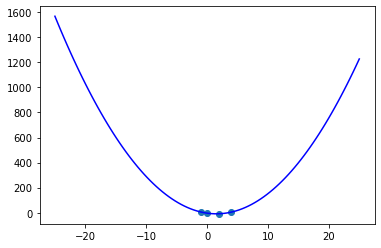

In [8]:
a = np.array([-1,2,0,4])
v = np.array([4,-10,-2,5])
rows = a.shape[0]
A = np.zeros((rows,3))
for i in range(0,rows-1):
    x = pow(a,i)
    A[:,i] = x
A =np.fliplr(A)
print(A)

At = A.T @ A
V = A.T @ v
U,L,P = LU(At)
V = P@V
y = fwdsub(L,V)
print(backsub(U,y))

x = np.linspace(-25,25,100) 
y1 =  2.24246231*x**2 -6.82035176*x -3.99748744
plt.plot(x,y1,'b')
plt.scatter(a,v)

# Affine Functions in Higher Dimensions

In two dimensions, any line can written as $y=mx+c$. We can rearrange this as $y-mx-c=0$. In general, an *affine function* $f:\mathbb{R}^2\to\mathbb{R}$ can be written as 

$$f(x,y)=ax+by+c.$$ 


**Note:** This is slightly different from a *linear* function. Linear functions always map the zero vector in the domain to the zero vector in the range. In this case, what condition would you have to impose on the above function to make it linear?


An affine function in a higher dimension $n$, $f:\mathbb{R}^n\to\mathbb{R}$ can be written as

$$f(x_1,x_2,\ldots,x_n)=a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n$$

**Note:** What condition on this would make the function linear?



## Machine Learning: Binary Classifiers

A basic problem in machine learning is: 'Given a set of data, decide which part of it belongs in set A, and which does not. For example, given a set of images, we might ask 'Which of these contain a cat?'. The problem is building a *binary classifier*: 

* A *classifier* divides a data set into different parts;<br><br>
* A classifier is *binary* if it divides the data set into precisely two parts.

For example, a classifier that divides all images into 'those containing a cat' and 'those not containing a cat' is a binary classifier.

The goal today is to build a binary classifier that will distinguish handwritten zeros from other handwritten digits. We will get there in a little while, but we'll start with two simpler examples.

### Classifying Points in the Plane

We'll start by generating random points in two clusters that are quite far apart in order to understand what our classifiers are going to look like, and how we compute them. We'll then look at the same idea when the two clusters overlap, and the answer isn't so straightforward.

#### Two Distinct Clusters

We will generate 200 random points in the $x-y$ plane. 100 of our points will be near $(2,3)$, and the rest near $(-4,-4)$. The command
```python
np.random.rand(n)
```
generates an vector of $n$ random numbers between $0$ and $1$, drawn from a uniform distribution (that is, any number in the range $[0,1]$ is equally likely to occur).

**Question 9** Write code to generate two $100\times2$ uniformlly distributed random arrays, where each row represents a point in the $x-y$ plane. The first array should contain points in a rectangle with opposite corners $(1.5,2)$ and $(2.5,4)$; The second array should contain points in a rectangle with opposite corners $(-5,-5)$ and $(-3,3)$. Plot your points, one set in red and the other in blue.

**Note:** It is good NumPy practice to first create arrays of the right shape (using, e.g., `np.zeros((m,n))`, then fill them.) 

If the *x*-coordinates of your points are in the array *X1* and the *y*-coordinates in the array *Y1*, the following code plots the points in blue. Changing the **b** to **r** plots in red:
```python
plt.scatter(X1,Y1,c='b')
```

Lastly, the command
```python
plt.gca().set_aspect('equal') # Note: gca is 'get current axes'
```
will ensure your scales are the same. This may or may not be a good thing! It's up to you to decide when to use equal scales.

[[-3.8237384   1.60371801]
 [-3.20457254 -1.91676351]
 [-3.21693854 -2.1652323 ]
 [-3.36832505 -1.57537182]
 [-4.92822083 -1.83947855]
 [-3.61648484  1.75703771]
 [-4.24263812 -2.00940953]
 [-3.96297811 -2.02735219]
 [-3.68409707 -1.67245634]
 [-4.61229956 -1.60364419]
 [-4.4553672   0.30243874]
 [-3.56278813 -3.4817926 ]
 [-3.43399278  0.77982921]
 [-3.29934472 -2.97071222]
 [-3.44951021  2.70139311]
 [-4.92667139 -3.93871003]
 [-4.76661253  1.45437358]
 [-3.4974386  -2.1600364 ]
 [-4.52156357 -4.32289356]
 [-4.49038797  0.84935021]
 [-3.28474894  2.97280684]
 [-3.10044195 -4.92325783]
 [-3.87662628 -3.0994129 ]
 [-4.64243896 -1.30460175]
 [-3.45949613  1.1220707 ]
 [-4.01523792  2.78002651]
 [-3.73749387  2.32757598]
 [-3.32100415 -0.30042575]
 [-4.07792121 -1.44499738]
 [-4.00411985 -1.47139248]
 [-3.64117776  0.55193097]
 [-3.69842817  0.81312779]
 [-4.46240952  0.87786206]
 [-4.86535067 -1.92623576]
 [-3.45710972  2.56316729]
 [-4.03803174  1.34935412]
 [-4.34158718 -2.93748268]
 

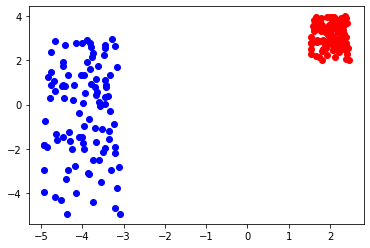

In [9]:
def rectangle(array, corner1x, corner1y, corner2x, corner2y):
    np.random.seed(20)
    array[:,0] = (corner2x-corner1x)*np.random.rand(100)+corner1x 
    array[:,1] = (corner2y-corner1y)*np.random.rand(100)+corner1y 
    return array
red = np.zeros((100,2))
blue = np.zeros((100,2))
red = rectangle(red, 1.5,2,2.5,4)
blue = rectangle(blue, -5,-5,-3,3)
plt.scatter(red[:,0],red[:,1],c='r')
plt.scatter(blue[:,0],blue[:,1],c='b')
print(blue)
#plt.gca().set_aspect('equal')

**Question 10** By looking at your plot above, write down a yes/no question that, given a point, will test whether it belongs in the red cluster or the blue.

Is the x value greater or less than zero? If greater, it is red. If less, it is blue.

#### Less Distinct Clusters

**Question 11** Modify your above code so that the first cluster is in the square cornered by $(5,5)$ and $(10,10)$, and the second cluster is in a rectangle cornered by $(8,4)$ and $(12,8)$. Looking at your plot, can you come up with a yes/no question similar to the one above that will test which cluster a given point belongs in? Can you come up with a yes/no question that decides which cluster a given point *probably* belongs in?

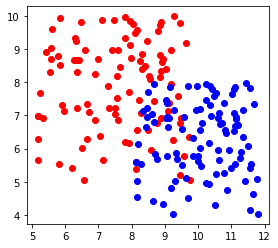

In [10]:
red = np.zeros((100,2))
blue = np.zeros((100,2))
red = rectangle(red, 5,5,10,10)
blue = rectangle(blue, 8,4,12,8)
plt.scatter(red[:,0],red[:,1],c='r')
plt.scatter(blue[:,0],blue[:,1],c='b')
plt.gca().set_aspect('equal')

### Our Classifiers

Ideally, we'd have a function takes one value, say, 1, on points from one cluster, and another value, say, -1, on points in the other cluster. If we had such a function, we'd be able to plug the coordinates of a point whose cluster is unknown into the function and read off the cluster from the result. Such a function rarely exists, even in a simple case like our second pair of clusters above, and certainly not in the case of handwritten digits.

Instead, our strategy will be to to use the idea of least squares to find a affine function that best approximates our desired function. We'll start with our clearly separated clusters from the first example.

Our ideal function would take the first 100 points and map them to 1, and the second 100 points to -1. That is, if $(x_1,y_1)$ is a point in the first cluster, then we'd like to find $a$, $b$, and $c$ such that 

$$ax_1+by_1+c=1,$$ 

and similarly for the second cluster (where a point should map to $-1$). Why doesn't such a function exist?

**Question 12** Create a $200\times 3$ array $A$ whose first two columns are the points in the clusters in Question 9 and whose last column is all ones. Write a matrix equation $Ax=v$ involving the coefficients of the ideal function described above (You may want to refer to Questions 1-4 above). Specifically, what are the vectors *x* and *v*?


In [11]:
red = np.zeros((100,2))
blue = np.zeros((100,2))
red = rectangle(red, 1.5,2,2.5,4)
blue = rectangle(blue, -5,-5,-3,3)
A = np.ones((200,3))
A[0:100,0:2] = red
A[100:200,0:2] = blue
#print(A)

#x is a 3x1 array of the coefficients: a, b, c. v is an array of 1s and -1s according to which cluster it belongs to (red or blue)

**Question 13** Create the vector *v*, then use the ideas above (and your LU code) to find the affine function that minimizes the sum of least squares from your ideal vector. Rewrite your function in slope-intercept form (Hint: Rearrange the equation $ax+by+c=0$). Lastly, plot your clusters and your function on the same set of axes. You should get quite a pretty picture!

**Note:** We pick zero for the right hand side of our plot because we would ideally want points likely to belong to one cluster to give us $1$, and points likely to belong to the other cluster to give us $-1$ when we plug them into $ax+by+c$. Zero, being half way in between, gives us (maybe...) the best separator. Suppose you were tasked with using your classifier to predict which cluster a *new point* $(x_0, y_0)$ would most likely belong to, if $ax_0+by_0+c$ is positive, the classifier would predict it belongs to the first cluster. If it is negative, the classifier predicts it would belong to the second.

[0.32079281 0.01226069 0.29548197]


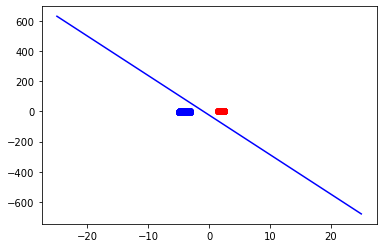

In [12]:
v = np.ones((200,1))
v[100:,0] = -1
At = A.T @ A
V = A.T @ v
U,L,P = LU(At)
V = P@V
y = fwdsub(L,V)
print(backsub(U,y))

red = np.zeros((100,2))
blue = np.zeros((100,2))
red = rectangle(red, 1.5,2,2.5,4)
blue = rectangle(blue, -5,-5,-3,3)
plt.scatter(red[:,0],red[:,1],c='r')
plt.scatter(blue[:,0],blue[:,1],c='b')
y1 =  (-0.32079281*x  - 0.29548197)/0.01226069
plt.plot(x,y1,'b')


**Question 14** Repeat Question 13 for your second set of two clusters.

[[ 7.94065401  9.12732376  1.        ]
 [ 9.48856864  6.92702281  1.        ]
 [ 9.45765365  6.77172981  1.        ]
 [ 9.07918739  7.14039261  1.        ]
 [ 5.17944793  6.97532591  1.        ]
 [ 8.45878791  9.22314857  1.        ]
 [ 6.89340471  6.86911905  1.        ]
 [ 7.59255473  6.85790488  1.        ]
 [ 8.28975733  7.07971479  1.        ]
 [ 5.96925109  7.12272238  1.        ]
 [ 6.36158201  8.31402421  1.        ]
 [ 8.59302967  5.94887963  1.        ]
 [ 8.91501805  8.61239326  1.        ]
 [ 9.2516382   6.26830486  1.        ]
 [ 8.87622447  9.81337069  1.        ]
 [ 5.18332153  5.66330623  1.        ]
 [ 5.58346868  9.03398349  1.        ]
 [ 8.7564035   6.77497725  1.        ]
 [ 6.19609108  5.42319152  1.        ]
 [ 6.27403007  8.65584388  1.        ]
 [ 9.28812766  9.98300427  1.        ]
 [ 9.74889513  5.04796385  1.        ]
 [ 7.80843429  6.18786694  1.        ]
 [ 5.8939026   7.30962391  1.        ]
 [ 8.85125967  8.82629419  1.        ]
 [ 7.4619052   9.86251657

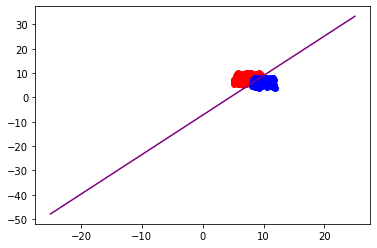

In [19]:
red = np.zeros((100,2))
blue = np.zeros((100,2))
red = rectangle(red, 5,5,10,10)
blue = rectangle(blue, 8,4,12,8)
A = np.ones((200,3))
A[0:100,0:2] = red
A[100:200,0:2] = blue
print(A)
v = np.ones((200,1))
v[100:,0] = -1
At = A.T @ A
V = A.T @ v
U,L,P = LU(At)
V = P@V
y = fwdsub(L,V)
print(backsub(U,y))


plt.scatter(red[:,0],red[:,1],c='r')
plt.scatter(blue[:,0],blue[:,1],c='b')
y1 =  (0.34884877*x  - 1.55619634)/0.21474861
plt.plot(x,y1,'purple')


**Question 15** Suppose that you were tasked with using your classifier to decide which cluster a given point $(x_1,y_1)$ belongs to. Clearly, plugging it into your affine function won't give $1$ or $-1$ in general. How would you use the result to decide which cluster your point is likely to be in? Feel free to experiment with a few points, of course!

If y1 - y (when y is the value of the equation) is greater than zero, that means it is above the line and belongs to that cluster (1). If it is less than zero, that means it is below the line and belongs to the lower cluster

In the next lab, we will apply these ideas to a large dataset and see if we can get a computer to recognize handwriting.